# 机器学习 Homework 3
**吴博成 2193211134**

# Section 1 : 数据导入——利用sklearn.datasets.load_diabetes函数导入数据集

In [1]:
from sklearn import datasets
dataset = datasets.load_diabetes()
print(dataset.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


# Section 2 : 数据标准化——将各维度的特征数据标准化为均值为0，方差为1的数据

In [2]:
import numpy as np
def Standard_Score(arr):
    mean = np.mean(arr)
    std = np.std(arr)
    return ((arr - mean)/std)
for i in range(dataset.data.shape[1]):
    dataset.data[:,i] = Standard_Score(dataset.data[:,i])
print(dataset.data)

[[ 0.80050009  1.06548848  1.29708846 ... -0.05449919  0.41855058
  -0.37098854]
 [-0.03956713 -0.93853666 -1.08218016 ... -0.83030083 -1.43655059
  -1.93847913]
 [ 1.79330681  1.06548848  0.93453324 ... -0.05449919  0.06020733
  -0.54515416]
 ...
 [ 0.87686984  1.06548848 -0.33441002 ... -0.23293356 -0.98558469
   0.32567395]
 [-0.9560041  -0.93853666  0.82123474 ...  0.55838411  0.93615545
  -0.54515416]
 [-0.9560041  -0.93853666 -1.53537419 ... -0.83030083 -0.08871747
   0.06442552]]


# Section 3 : 模型构建——线性回归模型、Ridge回归模型、LASSO回归模型

## 构建训练集和测试集

In [3]:
from sklearn import linear_model
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
# 10折10次交叉验证
kf = KFold(n_splits = 10 , shuffle = False, random_state = None)
cross_validation = {}
group_number = 1
for train_row_number,test_row_number in kf.split(dataset.data):
   cross_validation["Group "+str(group_number)] = {"train":{"X":dataset.data[train_row_number],"y":dataset.target[train_row_number]},"test":{"X":dataset.data[test_row_number],"y":dataset.target[test_row_number]}}
   group_number += 1
display(cross_validation)
# 留出法
X_train, X_test, y_train, y_test = train_test_split(dataset.data , dataset.target , test_size=0.3, random_state = None)

{'Group 1': {'train': {'X': array([[ 0.57139085,  1.06548848, -0.74228465, ..., -0.05449919,
           -0.31444188, -1.06765102],
          [-1.18511334, -0.93853666, -0.24377122, ..., -0.83030083,
           -0.16775723, -1.85139632],
          [-1.64333183, -0.93853666, -1.53537419, ..., -0.83030083,
           -0.38091476, -1.76431351],
          ...,
          [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
           -0.98558469,  0.32567395],
          [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
            0.93615545, -0.54515416],
          [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
           -0.08871747,  0.06442552]]),
   'y': array([ 53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182., 128.,
           52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163., 150.,
           97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170., 200.,
          252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,  42.,
          111

## 线性回归模型

In [4]:
LinearRegression_model = linear_model.LinearRegression().fit(X_train,y_train)

## Ridge回归模型

In [5]:
# alpha以指数分布采样，使得小的点采样数多
Ridge_model = GridSearchCV(linear_model.Ridge(),param_grid = {'alpha':np.logspace(-1,2,num = 500)},cv = 10,refit=True).fit(X_train,y_train).best_estimator_
print("Ridge的最优超参数值为: {}".format(Ridge_model.alpha))


Ridge的最优超参数值为: 21.2155017136245


## LASSO回归模型

In [6]:
Lasso_model = GridSearchCV(linear_model.Lasso(),param_grid = {'alpha':np.logspace(-1,2,num = 500)},cv = 10,refit=True).fit(X_train,y_train).best_estimator_
print("Lasso的最优超参数值为: {}".format(Lasso_model.alpha))

Lasso的最优超参数值为: 2.3482346005542762


# Section 4 : 模型比较———比较三个模型在R-squared值和特征回归系数上的差异

In [7]:
print('线性回归模型的特征回归系数为\n',LinearRegression_model.coef_)
print('线性回归模型的R^2值为',LinearRegression_model.score(X_test,y_test))
print('Ridge回归模型的特征回归系数为\n',Ridge_model.coef_)
print('Ridge回归模型的R^2值为',Ridge_model.score(X_test,y_test))
print('LASSO回归模型的特征回归系数为\n',Lasso_model.coef_)
print('LASSO回归模型的R^2值为',Lasso_model.score(X_test,y_test))

线性回归模型的特征回归系数为
 [ -1.32267589 -13.39765894  24.40242638  14.99006147 -39.53702011
  23.32764885   8.24874331  14.71805346  37.25507772   0.91921276]
线性回归模型的R^2值为 0.4551721480257601
Ridge回归模型的特征回归系数为
 [ -0.81341397 -11.98530342  23.35952525  14.21099733  -4.1603577
  -3.44461548  -7.75808437   9.10733732  23.20398264   1.7820042 ]
Ridge回归模型的R^2值为 0.4559445703925409
LASSO回归模型的特征回归系数为
 [ -0.          -9.07928733  23.84886464  12.24490348  -0.
  -0.32902164 -11.40563851   0.          24.28818423   0.        ]
LASSO回归模型的R^2值为 0.4551268781301341


<font size = 5pt color = '#00FFFF'>
可以看到：

* 以上三个模型拟合效果相差不大，其中Ridge回归模型的R方最大，拟合效果最好；线性回归模型的R方其次；LASSO回归模型的R方最小，拟合效果最差

* 特征回归系数上，LASSO可以使得尽可能多的特征项的特征系数为0，去除不必要特征；线性回归模型会有部分维度特征权重极大；Ridge回归模型各特征的权重相对均衡

</font>

# Section 5 : 绘制图线———绘制Ridge回归模型和LASSO回归模型中特征回归系数变化情况

## Ridge回归模型

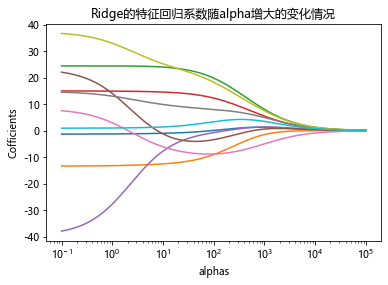

In [19]:
import matplotlib.pyplot as plt
alphas= np.logspace(-1,5,num = 500)
Ridge_cofficients = {}
for alpha in alphas:
    Ridge = linear_model.Ridge(alpha = alpha).fit(X_train, y_train)
    Ridge_cofficients[alpha] = Ridge.coef_
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(Ridge_cofficients.keys(),Ridge_cofficients.values())
plt.xscale('log') #对x轴作对数变换
plt.title('Ridge的特征回归系数随alpha增大的变化情况')
plt.xlabel('alphas')
plt.ylabel('Cofficients')
plt.show()

## Lasso回归模型

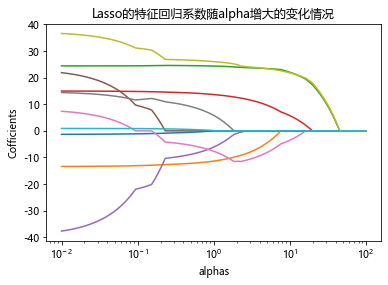

In [20]:
import matplotlib.pyplot as plt
alphas= np.logspace(-2,2,num = 500)
Lasso_cofficients = {}
for alpha in alphas:
    Lasso = linear_model.Lasso(alpha = alpha).fit(X_train, y_train)
    Lasso_cofficients[alpha] = Lasso.coef_
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(Lasso_cofficients.keys(),Lasso_cofficients.values())
plt.xscale('log') #对x轴作对数变换
plt.title('Lasso的特征回归系数随alpha增大的变化情况')
plt.xlabel('alphas')
plt.ylabel('Cofficients')
plt.show()